In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import preprocessing, layers, models

2025-12-21 02:05:39.784551: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-21 02:05:40.149527: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-21 02:05:41.876980: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [10]:
df_dir='/home/chinghia/AI_Engineer/Fake_Real/archive/train'

In [11]:
img_size=(32,32)
batch_size=32

In [12]:
df_train=preprocessing.image_dataset_from_directory(
    df_dir,
    label_mode='binary',
    color_mode='rgb',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)
df_val=preprocessing.image_dataset_from_directory(
    df_dir,
    label_mode='binary',
    color_mode='rgb',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation'
)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.


I0000 00:00:1766257549.609429   34752 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 100000 files belonging to 2 classes.
Using 20000 files for validation.


In [5]:
df_train.class_names

['FAKE', 'REAL']

In [6]:
df_val.class_names

['FAKE', 'REAL']

2025-12-21 02:05:53.510828: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


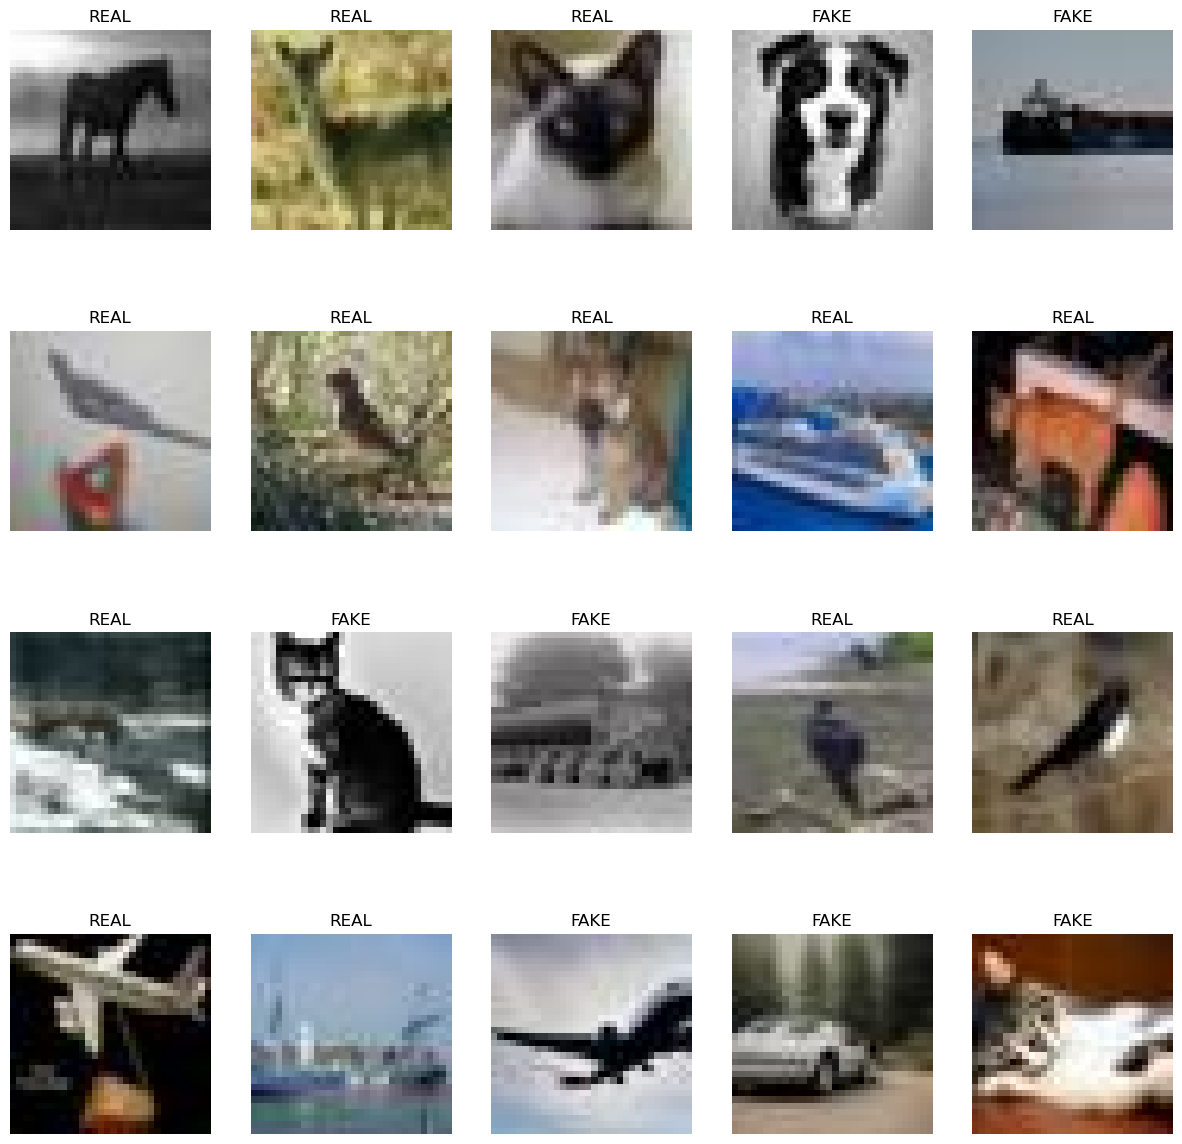

In [13]:
label_name=df_train.class_names
plt.figure(figsize=(15,15))
for img,label in df_train.take(1):
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(label_name[int(label[i])])
        plt.axis('off')
plt.show()

In [ ]:
model=models.Sequential([
    layers.Rescaling(1./255,input_shape=(32,32,3)),

    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
])

/home/chinghia/miniconda3/envs/ai_env/lib/python3.10/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 366,785 (1.40 MB)

 Trainable params: 366,337 (1.40 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    df_train,
    epochs=3,
    batch_size=batch_size,
    validation_data=(df_val)
)

Epoch 1/3


2025-12-19 22:08:58.944548: I external/local_xla/xla/service/service.cc:163] XLA service 0x775b60008290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-19 22:08:58.944592: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-12-19 22:08:58.990736: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-19 22:08:59.379780: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91700
2025-12-19 22:08:59.548161: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-19 22:08:

  25/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5280 - loss: 0.9927 

I0000 00:00:1766156944.554585  190693 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2498/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8055 - loss: 0.4269

2025-12-19 22:09:16.524893: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-19 22:09:17.033632: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_157', 100 bytes spill stores, 100 bytes spill loads



2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.8649 - loss: 0.3226 - val_accuracy: 0.8799 - val_loss: 0.2843
Epoch 2/3
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9181 - loss: 0.2148 - val_accuracy: 0.6787 - val_loss: 0.6345
Epoch 3/3
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9318 - loss: 0.1798 - val_accuracy: 0.9261 - val_loss: 0.1982


In [13]:
scoce=model.evaluate(df_val)

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9261 - loss: 0.1982


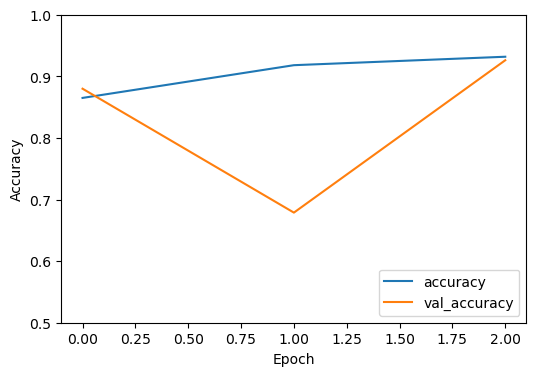

In [16]:
plt.figure(figsize=(6,4 ))
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [17]:
model.save('real_fake.keras')

In [14]:
img_val=[]
label_val=[]

for img,label in df_val:
    img_val.append(img.numpy())
    label_val.append(label.numpy())

img_val=np.concatenate(img_val)
label_val=np.concatenate(label_val)    

2025-12-21 02:06:04.352675: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [31]:
img_val.shape

(20000, 32, 32, 3)

In [32]:
label_val.shape

(20000, 1)

In [35]:
label_val

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [33]:
y_pred=model.predict(img_val)

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [38]:
y_pred

array([[1.3850097e-04],
       [8.0396272e-03],
       [8.6025279e-03],
       ...,
       [3.4975651e-01],
       [6.5462239e-04],
       [8.9755064e-01]], dtype=float32)

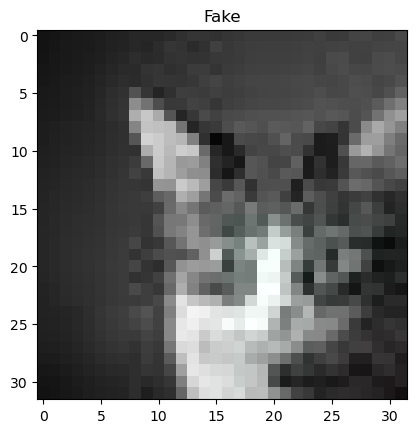

Fake


In [42]:
def label_name_pred(test):
    if test > 0.5:
        return('Real')
    else:
        return('Fake')


plt.imshow(img_val[50].astype('uint8'))
plt.title(label_name_pred(np.argmax(y_pred[50])))
plt.show()
print(label_name_pred(label_val[50]))